In [1]:
import pandas as pd 
import re
import string
import nltk
import re
import html2text
import enchant
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.ticker as ticker

In [2]:
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
nltk.download('words')
english_words = set(words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dheer\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [4]:
country=[]
dataset='Australia_tweets_of_interest.csv'
with open(dataset,encoding="utf-8") as file:
    
    for line in file:
        country.append(line.split('|@|||$|')[2])

In [5]:
data=pd.DataFrame(country,columns=['text'])

In [6]:
data.shape

(679361, 1)

In [7]:
def cleanre(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    words = text.split()
    words = [word for word in words if word.lower() in english_words]
    clean_text = ' '.join(words)
    return clean_text

In [8]:
for i,idx in data.iterrows():
    idx['text']=cleanre(idx['text'])

In [9]:
data.head(30)

,text
0,Carry on sir x
1,Me at
2,es se con no se manipular el de la
3,Place based community led service development ...
4,
5,so much i appreciate u
6,So had this in the since thought it was good t...
7,Can you take me please
8,They were only at which I found ridiculously d...
9,Eating my at the Hotel in Man at next table by...


In [10]:
country1=[]
dataset='Nigeria_tweets_of_interest.csv'
with open(dataset,encoding="utf-8") as file:
    
    for line in file:
        country1.append(line.split('|@|||$|')[2])

In [11]:
data1=pd.DataFrame(country1,columns=['text'])

In [12]:
data1.shape

(666103, 1)

In [13]:
for i,idx in data1.iterrows():
    idx['text']=cleanre(idx['text'])

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Create TF-IDF vectors for the datasets
vectorizer = TfidfVectorizer()
tfidf_matrix_1 = vectorizer.fit_transform(data['text'][:40000])
tfidf_matrix_2 = vectorizer.transform(data['text'][:40000])

# Combine the TF-IDF vectors into a single matrix
tfidf_matrix = sp.sparse.vstack([tfidf_matrix_1, tfidf_matrix_2])

# Apply SVD to the matrix to reduce dimensionality
svd = TruncatedSVD(n_components=50)
reduced_matrix = svd.fit_transform(tfidf_matrix)

# Calculate cosine similarity between the reduced TF-IDF vectors
similarity_matrix = cosine_similarity(reduced_matrix[:len(data['text'][:40000])], reduced_matrix[len(data['text'][:40000]):])


In [15]:
avg_similarity = np.mean(similarity_matrix)
print("Average similarity score:", avg_similarity)

Average similarity score: 0.08090558886444728


In [22]:
vectorizer = TfidfVectorizer(stop_words='english')
text1 = vectorizer.fit_transform(data['text'][:10000])
text2 = vectorizer.transform(data1['text'][:10000])

In [23]:
similarity_matrix = cosine_similarity(text1, text2)

In [24]:
avg_similarity = np.mean(similarity_matrix)
print("Average similarity score:", avg_similarity)


Average similarity score: 0.002287873395504121


In [25]:
corpus1 = [doc.lower().translate(str.maketrans('', '', string.punctuation)) for doc in data['text']]
corpus2 = [doc.lower().translate(str.maketrans('', '', string.punctuation)) for doc in data1['text']]

In [26]:
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X1 = vectorizer.fit_transform(corpus1)
X2 = vectorizer.fit_transform(corpus2)

In [27]:
bigram_counts1 = Counter(vectorizer.get_feature_names())
bigram_counts2 = Counter(vectorizer.get_feature_names())

C:\Users\Dheer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
data1['tokens'] = data1['text'].apply(nltk.word_tokenize)
stop_words = set(stopwords.words('english'))
data1['tokens'] = data1['tokens'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words and word.isalpha()])
sia = SentimentIntensityAnalyzer()
data1['sentiment'] = data1['tokens'].apply(lambda x: sia.polarity_scores(' '.join(x))['compound'])


In [29]:
positive1 = data1[data1['sentiment'] > 0.2]
neutral1 = data1[(data1['sentiment'] >= -0.2) & (data1['sentiment'] <= 0.2)]
negative1 = data1[data1['sentiment'] < -0.2]

In [30]:
data['tokens'] = data['text'].apply(nltk.word_tokenize)

In [31]:
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words and word.isalpha()])

In [32]:
sia = SentimentIntensityAnalyzer()
data['sentiment'] = data['tokens'].apply(lambda x: sia.polarity_scores(' '.join(x))['compound'])


In [33]:
positive = data[data['sentiment'] > 0.2]
neutral = data[(data['sentiment'] >= -0.2) & (data['sentiment'] <= 0.2)]
negative = data[data['sentiment'] < -0.2]

In [ ]:
len(positive)

In [ ]:
len(negative)

In [ ]:
len(neutral)

In [34]:
australia={'positive':len(positive),'neutral':len(neutral),'negative':len(negative)}


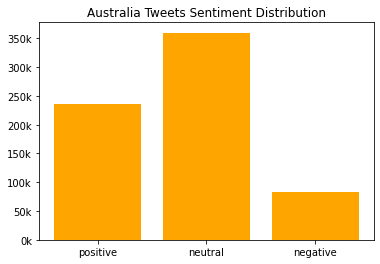

In [48]:
fig, ax = plt.subplots()
ax.bar(list(australia.keys()),list(australia.values()),color='orange')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
plt.title('Australia Tweets Sentiment Distribution')
plt.savefig('Aus_senti_bar24.png')

In [38]:
nigeria={'positive':len(positive1),'neutral':len(neutral1),'negative':len(negative1)}

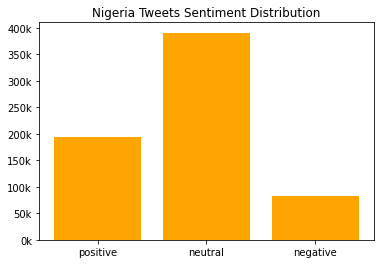

In [51]:
fig, ax = plt.subplots()
ax.bar(list(nigeria.keys()),list(nigeria.values()),color='orange')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
plt.title('Nigeria Tweets Sentiment Distribution')

plt.savefig('Nigeria_senti_bar244.png')

In [40]:
country2=[]
dataset='England_tweets_of_interest.csv'
with open(dataset,encoding="utf-8") as file:
    
    for line in file:
        country2.append(line.split('|@|||$|')[2])

In [41]:
data2=pd.DataFrame(country2,columns=['text'])

In [42]:
for i,idx in data2.iterrows():
    idx['text']=cleanre(idx['text'])

In [43]:
data2.head()

,text
0,Good afternoon Time for some coffee
1,hello respect Board of of people welcome in mo...
2,hello respect Board of of people welcome in mo...
3,All know the meaning of the word of heavenly God
4,hello respect Board of of people welcome in mo...


In [44]:
data2['tokens'] = data2['text'].apply(nltk.word_tokenize)
stop_words = set(stopwords.words('english'))
data2['tokens'] = data2['tokens'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words and word.isalpha()])
sia = SentimentIntensityAnalyzer()
data2['sentiment'] = data2['tokens'].apply(lambda x: sia.polarity_scores(' '.join(x))['compound'])
positive2 = data2[data2['sentiment'] > 0.2]
neutral2 = data2[(data2['sentiment'] >= -0.2) & (data2['sentiment'] <= 0.2)]
negative2 = data2[data2['sentiment'] < -0.2]

In [46]:
england={'positive':len(positive2),'neutral':len(neutral2),'negative':len(negative2)}

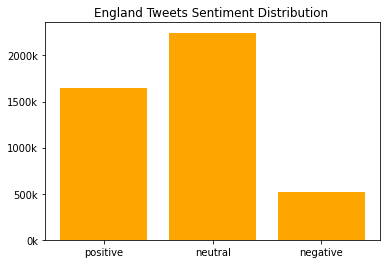

In [52]:
fig, ax = plt.subplots()
ax.bar(list(england.keys()),list(england.values()),color='orange')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
plt.title('England Tweets Sentiment Distribution ')

plt.savefig('Eng_senti_bar244.png')

In [36]:
def y_fmt(x, pos):
    """
    Function to format y-ticks as thousands with a 'k' suffix
    """
    return f'{x/1000:.0f}k'

In [ ]:
data2.to_csv('eng_cleanre.csv')